In [116]:
import numpy as np
import pandas as pd

In [117]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import os
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy

In [119]:
books_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=',', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [120]:
books = pd.read_csv('BX_Books2.csv', sep=',', encoding='latin-1', error_bad_lines=False)

In [121]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002  Oxford University Press   
1  Richard Bruce Wright                 2001    HarperFlamingo Canada   
2          Carlo D'Este                 1991          HarperPerennial   
3      Gina Bari Kolata                 1999     Farrar Straus Giroux   
4       E. J. W. Barber                 1999   W. W. Norton & Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [122]:
books_ratings.head()

UserID        ISBN  BookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6

In [123]:
# books_books = pd.read_csv('BX_Books.csv')

In [124]:
books_ratings.UserID=books_ratings.UserID.astype(str)
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1149780 non-null  object
 1   ISBN        1149780 non-null  object
 2   BookRating  1149780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


In [125]:

reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 10.0))
df = Dataset.load_from_df(books_ratings, reader)

In [126]:
# from sklearn.preprocessing import StandardScaler

In [127]:
# books_ratings.BookRating.unique()

In [128]:
# !pip install plotly

In [129]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        
        
        '''))


In [130]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = books_ratings["BookRating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / books_ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(books_ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
     

In [131]:
configure_plotly_browser_state()


data = books_ratings.groupby('ISBN')['BookRating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [132]:
data.head()

ISBN
 0330299891    2
 0375404120    2
 0586045007    1
 9022906116    2
 9032803328    1
Name: BookRating, dtype: int64

In [133]:

configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [134]:
type(data)

pandas.core.series.Series

In [135]:
type(df)

surprise.dataset.DatasetAutoFolds

## **Вот эта часть кода снизу, которая меня бесит**

In [136]:

# param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
#               'reg_all': [0.08, 0.1, 0.15]}

param_grid = {'n_factors': [25], 'n_epochs': [15], 'lr_all': [0.001, 0.003],
              'reg_all': [0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose = 432)

gs.fit(df)

algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [137]:
print(gs.best_score['mae'])
print(gs.best_params['mae'])

2.862453102210037
{'n_factors': 25, 'n_epochs': 15, 'lr_all': 0.003, 'reg_all': 0.08}


In [138]:

trainset, testset = train_test_split(df, test_size=0.25)
algo = SVD(n_factors = 25, n_epochs = 15, lr_all = 0.003, reg_all = 0.1)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 3.4180


3.4180232189899504

Эмпирически проверено, что минимальная ошибка достигается при этих параметрах как следствие, модель наиболее оптимальна.

In [139]:
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)


In [140]:
df_predictions.head()

uid         iid   rui       est                    details   Iu  Ui  \
0    7550  9024509629   0.0  2.690614  {'was_impossible': False}    0   1   
1   88793  0671047922   0.0  2.924945  {'was_impossible': False}  152   0   
2  254299  0936085274  10.0  4.136069  {'was_impossible': False}   39   2   
3    3757  847509452X   6.0  5.722274  {'was_impossible': False}  469   0   
4  149084  0875423051   0.0  0.821788  {'was_impossible': False}  144   0   

        err  
0  2.690614  
1  2.924945  
2  5.863931  
3  0.277726  
4  0.821788

In [141]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]


In [142]:
temp = books_ratings.loc[books_ratings['ISBN'] == '0195153448']['BookRating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [143]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []

    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1   

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)  

    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

threshold      tp      fp      tn     fn  Precision    Recall        F1
0         0.0  287445       0       0      0   1.000000  1.000000  1.000000
1         0.5  108269  179176       0      0   0.376660  1.000000  0.547208
2         1.0  105634  133987   45189   2635   0.440838  0.975662  0.607284
3         1.5  101316  111408   68204   6517   0.476279  0.939564  0.632125
4         2.0   95708   90180   89432  12125   0.514869  0.887558  0.651693
5         2.5   86486   70196  110145  20618   0.551984  0.807496  0.655729
6         3.0   68025   45640  134701  39079   0.598469  0.635130  0.616255
7         3.5   48718   27360  154476  56891   0.640369  0.461305  0.536285
8         4.0   34834   15858  165978  70775   0.687170  0.329839  0.445730
9         4.5   24342    9035  175037  79031   0.729305  0.235477  0.356007
10        5.0   17060    4823  179249  86313   0.779601  0.165033  0.272402

In [144]:



def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [145]:



results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.6070160134587825, 'Recall': 0.8134478060412138},
 {'K': 3, 'Precision': 0.6059013714942453, 'Recall': 0.8504434611623787},
 {'K': 4, 'Precision': 0.604937310043549, 'Recall': 0.8702697074156256},
 {'K': 5, 'Precision': 0.6046600342008164, 'Recall': 0.882352497537322},
 {'K': 6, 'Precision': 0.6042377164378547, 'Recall': 0.8903835971770514},
 {'K': 7, 'Precision': 0.6039909523117208, 'Recall': 0.8962415591430031},
 {'K': 8, 'Precision': 0.6037335560639204, 'Recall': 0.9005333695122821},
 {'K': 9, 'Precision': 0.6035930719446837, 'Recall': 0.9039101661790511},
 {'K': 10, 'Precision': 0.6034456068897477, 'Recall': 0.9065265689710855}]

In [146]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


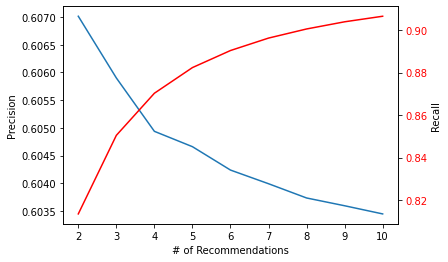

In [147]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')
    ###


In [148]:
trainset = df.build_full_trainset()   #Build on entire data set
testset = trainset.build_testset()
algo = SVD(n_factors= 25, n_epochs= 15, lr_all= 0.003, reg_all= 0.08)
algo.fit(trainset)
print('dknjdn')
# Predict ratings for all pairs (u, i) that are NOT in the training set.


print('dknjdn', 2)
#Predicting the ratings for testset
predictions = algo.test(testset)


dknjdn
dknjdn 2


In [149]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n


In [150]:
all_pred = get_all_predictions(predictions)

In [151]:
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [152]:
# print(all_pred.values()[0])

TypeError: ignored

In [153]:
tmp = pd.DataFrame.from_dict(all_pred, orient='index')
# tmp_transpose = tmp.transpose()
tmp

0                                 1  \
276725   (034545104X, 2.7256141347244265)                              None   
276726    (0155061224, 3.060616989287343)                              None   
276727    (0446520802, 3.508415492468042)                              None   
276729    (0521795028, 3.215193231418475)  (052165615X, 2.9619001802055367)   
276733   (2080674722, 2.8014055165555467)                              None   
...                                   ...                               ...   
276704   (0743211383, 3.4206608138473267)  (0446353957, 3.0146284631602884)   
276706   (0679447156, 2.8967633525515426)                              None   
276709   (0515107662, 4.7564444525961775)                              None   
276721   (0590442449, 3.0413144025404253)                              None   
276723  (05162443314, 3.4711352853076085)                              None   

                                       2                                 3  
276725                              None                              None  
276726                              None                              None  
276727                              None                              None  
276729                              None                              None  
276733                              None                              None  
...                                  ...                               ...  
276704  (1563526298, 2.9450280172574694)  (0446605409, 2.8407799178756385)  
276706                              None                              None  
276709                              None                              None  
276721                              None                              None  
276723                              None                              None  

[105283 rows x 4 columns]

In [154]:

def get_predictions(user_id):
    results = tmp.loc[user_id]
    return results

In [155]:
results = get_predictions("276704")
results

0    (0743211383, 3.4206608138473267)
1    (0446353957, 3.0146284631602884)
2    (1563526298, 2.9450280172574694)
3    (0446605409, 2.8407799178756385)
Name: 276704, dtype: object

In [156]:
recommended_books_ids=[]
for x in range(0, n):
    recommended_books_ids.append(results[x][0])

recommended_books_ids

['0743211383', '0446353957', '1563526298', '0446605409']

In [157]:


books.head()
recommended_books = books[books['ISBN'].isin(recommended_books_ids)]


In [158]:
recommended_books

ISBN                                         Book-Title  \
881    0743211383                                       Dreamcatcher   
6262   0446605409                                        Plum Island   
14197  0446353957                                       Mirror Image   
69547  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

          Book-Author  Year-Of-Publication         Publisher  \
881      Stephen King                 2001          Scribner   
6262   Nelson DeMille                 1998      Warner Books   
14197    Sandra Brown                 1990      Warner Books   
69547    Clark Howard                 2000  Longstreet Press   

                                             Image-URL-S  \
881    http://images.amazon.com/images/P/0743211383.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
14197  http://images.amazon.com/images/P/0446353957.0...   
69547  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
881    http://images.amazon.com/images/P/0743211383.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
14197  http://images.amazon.com/images/P/0446353957.0...   
69547  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
881    http://images.amazon.com/images/P/0743211383.0...  
6262   http://images.amazon.com/images/P/0446605409.0...  
14197  http://images.amazon.com/images/P/0446353957.0...  
69547  http://images.amazon.com/images/P/1563526298.0...

In [159]:
books_ratings

UserID         ISBN  BookRating
0        276725   034545104X           0
1        276726   0155061224           5
2        276727   0446520802           0
3        276729   052165615X           3
4        276729   0521795028           6
...         ...          ...         ...
1149775  276704   1563526298           9
1149776  276706   0679447156           0
1149777  276709   0515107662          10
1149778  276721   0590442449          10
1149779  276723  05162443314           8

[1149780 rows x 3 columns]

In [160]:



temp = books_ratings[books_ratings['UserID'] == "276704"].sort_values("BookRating", ascending = False)
temp.head()


UserID        ISBN  BookRating
1149775  276704  1563526298           9
1149771  276704  0743211383           7
1149761  276704  0345386108           6
1149762  276704  0380796155           5
1149773  276704  0806917695           5

In [161]:
temp.shape

(17, 3)

In [162]:

history_books_ids = temp['ISBN']
user_history = books[books['ISBN'].isin(history_books_ids)]

In [163]:
user_history[:n]

ISBN                 Book-Title     Book-Author  \
881    0743211383               Dreamcatcher    Stephen King   
5309   080410526X  All I Really Need to Know  ROBERT FULGHUM   
6262   0446605409                Plum Island  Nelson DeMille   
11886  0345386108                Winter Moon  Dean R. Koontz   

       Year-Of-Publication         Publisher  \
881                   2001          Scribner   
5309                  1989         Ivy Books   
6262                  1998      Warner Books   
11886                 1995  Ballantine Books   

                                             Image-URL-S  \
881    http://images.amazon.com/images/P/0743211383.0...   
5309   http://images.amazon.com/images/P/080410526X.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
11886  http://images.amazon.com/images/P/0345386108.0...   

                                             Image-URL-M  \
881    http://images.amazon.com/images/P/0743211383.0...   
5309   http://images.amazon.com/images/P/080410526X.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
11886  http://images.amazon.com/images/P/0345386108.0...   

                                             Image-URL-L  
881    http://images.amazon.com/images/P/0743211383.0...  
5309   http://images.amazon.com/images/P/080410526X.0...  
6262   http://images.amazon.com/images/P/0446605409.0...  
11886  http://images.amazon.com/images/P/0345386108.0...

In [164]:
recommended_books

ISBN                                         Book-Title  \
881    0743211383                                       Dreamcatcher   
6262   0446605409                                        Plum Island   
14197  0446353957                                       Mirror Image   
69547  1563526298  Get Clark Smart : The Ultimate Guide for the S...   

          Book-Author  Year-Of-Publication         Publisher  \
881      Stephen King                 2001          Scribner   
6262   Nelson DeMille                 1998      Warner Books   
14197    Sandra Brown                 1990      Warner Books   
69547    Clark Howard                 2000  Longstreet Press   

                                             Image-URL-S  \
881    http://images.amazon.com/images/P/0743211383.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
14197  http://images.amazon.com/images/P/0446353957.0...   
69547  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-M  \
881    http://images.amazon.com/images/P/0743211383.0...   
6262   http://images.amazon.com/images/P/0446605409.0...   
14197  http://images.amazon.com/images/P/0446353957.0...   
69547  http://images.amazon.com/images/P/1563526298.0...   

                                             Image-URL-L  
881    http://images.amazon.com/images/P/0743211383.0...  
6262   http://images.amazon.com/images/P/0446605409.0...  
14197  http://images.amazon.com/images/P/0446353957.0...  
69547  http://images.amazon.com/images/P/1563526298.0...